(771, 735)


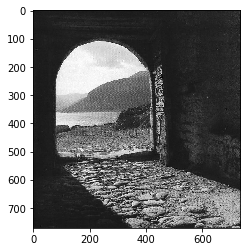

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# Load an image
f = np.array(Image.open('monemvasia1955.png'))
print(f.shape)
#print(f)
plt.imshow(f, cmap="gray")
plt.show()

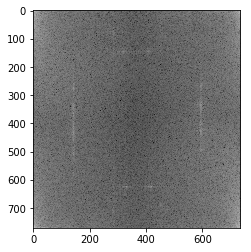

In [2]:
# Import numpy routines to compute the Fourier transform
from numpy.fft import fft2
# Compute the Fourier transform with the fast fourier transform (FFT).
# This is equivalent to computing the DFT, but computationally much faster.
F = fft2(f)
#print(F)
plt.imshow(np.log(1+np.abs(F)), cmap="gray")
plt.show()

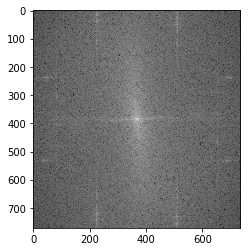

In [3]:
# In order to ease frequency domain manipulations, as well as for more convenient visualisation,
# we shift the zero frequency to the middle of the image:
from numpy.fft import fftshift
Fshifted = fftshift(F)
plt.imshow(np.log(1+np.abs(Fshifted)), cmap="gray")
plt.show()

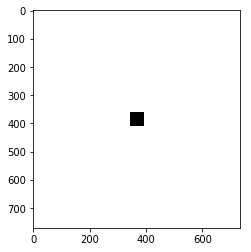

In [4]:
# We'll create a simple high-pass filter.
# This filter is known as ideal high-pass filter (IHPF):
H = np.ones_like(F)
spectrum_center = [x // 2 for x in F.shape]
platos = 25
H[spectrum_center[0]-platos:spectrum_center[0]+platos,spectrum_center[1]-platos:spectrum_center[1]+platos] = 0.
plt.imshow(np.log(1+np.abs(H)), cmap="gray")
plt.show()

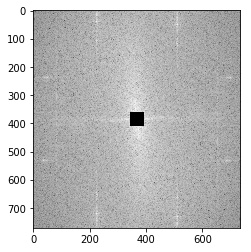

In [7]:
# Filtering is then simply a point-to-point multiplication
Ffiltered_shifted = Fshifted * H
plt.imshow(np.log(1+np.abs(Ffiltered_shifted)), cmap="gray")
plt.show()

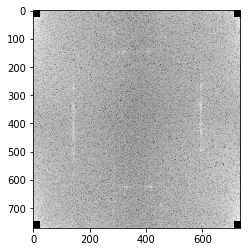

In [6]:
# Shift the zero-frequency back to the top-left corner, since we're done with filtering
from numpy.fft import ifftshift
Ffiltered = ifftshift(Ffiltered_shifted)
plt.imshow(np.log(1+np.abs(Ffiltered)), cmap="gray")
plt.show()

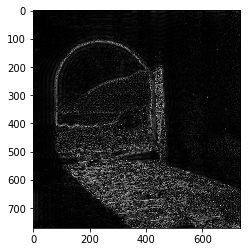

In [8]:
# And now compute the inverse Fourier transform
from numpy.fft import ifft2
# Note that due to numerical error, the ifft2 might have a (small) imaginary component
# Hence we need to explicitly convert the result to a real matrix
f_filtered = np.abs(ifft2(Ffiltered))
#print(f_filtered)
plt.imshow(f_filtered, cmap="gray")
plt.show() # note the result of the filter (sharp edges of the image)